<div style="font-size:xx-large;font-family:sans-serif;font-weight:bold;line-height:normal">情報工学実験3 画像変換
<br>第3回：２次元フーリエ変換と周波数フィルタリング</div>
<hr>

# 1次元フーリエ変換

2次元フーリエ変換に入る前に，1次元フーリエ変換について確認する．

## 正弦波の重ね合わせ

異なる周波数（波長）を持つ正弦波の重ね合わせることで複雑な関数$f(t)$を表現できることを実験的に確認してみよう．例えば，3つの異なる周波数の正弦波に重みを付けて重ね合わせることで，左に示す複雑な関数を合成できる．
$$
f(t) = \sin(2\pi t) + 0.5\sin(4\cdot 2\pi t) + 0.7\sin(16\cdot 2\pi t).
$$
<img src="img/fourier1.png"/>

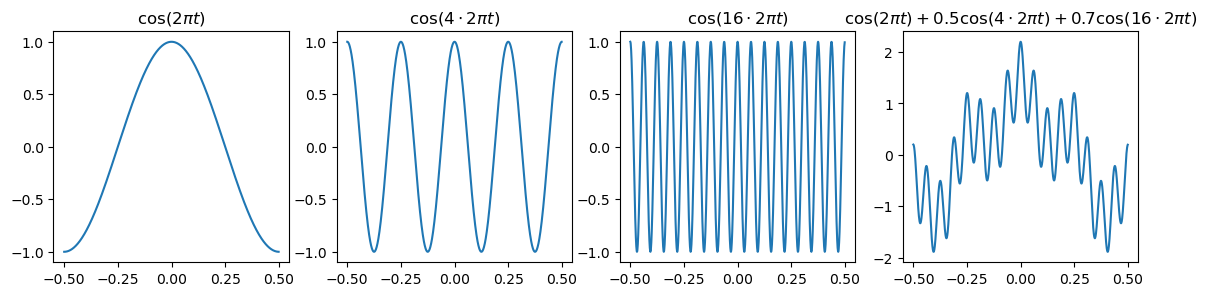

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 図の作成
plt.figure(figsize=(14, 3))

# t軸の点列の生成
ts = np.arange(-0.5, 0.5, 0.001)

plt.subplot(1,4,1); plt.title("$\cos(2\pi t)$"); plt.plot(ts, np.cos(2*np.pi*ts))
plt.subplot(1,4,2); plt.title("$\cos(4\cdot 2\pi t)$"); plt.plot(ts, np.cos(8*np.pi*ts))
plt.subplot(1,4,3); plt.title("$\cos(16\cdot 2\pi t)$"); plt.plot(ts, np.cos(32*np.pi*ts))
plt.subplot(1,4,4); plt.title("$\cos(2\pi t) + 0.5\cos(4\cdot2\pi t) + 0.7\cos(16\cdot2\pi t)$")
plt.plot(ts, np.cos(2*np.pi*ts) + 0.5*np.cos(4*2*np.pi*ts) + 0.7*np.cos(16*2*np.pi*ts))

## シミュレーション実験1

正弦波$\cos(2\pi k t), k=1, 2, .., 4$を合成してできる関数$f(t)$を可視化してみる．
$$
  f(t) = a_0 + a_1\cos(2\pi t) + a_2\cos(2\pi 2t) + a_3\cos(2\pi 3t) + a_4\cos(2\pi 4t)
$$
1. 重みパラメータ$a_k (k=0, 1, 2, 3, 4)$`を調整しながら合成される波形を観察しなさい．
2. 下図の波形を合成するには，重みパラメータ$a_k$をどのような値に設定すれば良いか？

<img src="img/fourier3.png" width=300pt/>

In [13]:
from ipywidgets import interactive, HBox, VBox
from IPython.display import display

## t軸の点列の生成
ts = np.arange(-0.5, 0.5, 0.005)
a = np.array([2, 1, 0, 0, 1])
a0, a1, a2, a3, a4 = 1, 0, 0, 1, 0

def draw_curve(a0, a1, a2, a3, a4):
    ys = a0\
       + a1 * np.cos(1* 2*np.pi * ts)\
       + a2 * np.cos(2* 2*np.pi * ts)\
       + a3 * np.cos(3* 2*np.pi * ts)\
       + a4 * np.cos(4* 2*np.pi * ts)
      
    plt.xlim(-0.5, 0.5); plt.ylim(-8, 8)
    plt.grid(True); plt.plot(ts, ys)
    plt.title("$a_0+a_1\cos(2\pi t) + a_2\cos(2\cdot\pi t)  + a_3\cos(3\cdot\pi t) + a_4\cos(4\cdot\pi t)$")
    plt.show()

w = interactive(draw_curve, a0=(-2, 2, 0.5), a1=(-2, 2, 0.5), a2=(-2, 2, 0.5), a3=(-2, 2, 0.5), a4=(-2, 2, 0.5))
w = HBox([VBox(w.children[0:5]), w.children[5]])
display(w)

## 1Dフーリエ級数展開

上の例で分かるように，$\cos$波の重ね合わせだけでは原点対称の関数しか表現できない．$\cos$波と$\sin$波の両方（正弦波とよぶ）を重ね合わせることで任意の周期関数$f(t)$を表現できる．数式で表すと，
$$
f(t) = a_0 / 2 + \sum_{k=1}^{\infty}\left( a_k \cos k\omega_0 t + b_k \sin k \omega_0 t\right),\;\; -\frac{T}{2}\leq t \leq \frac{T}{2}.\\
$$

この式を**フーリエ級数**(Fourier series)，重みパラメータ$a_k, b_k　(k = 0, 1, 2, ...)$を**フーリエ係数**(Fourier coefficients)とよぶ．

フーリエ係数は次式のように関数$f(t)$に正弦波をかけて積分すること（相関計算）で求めることができる．
$$
\begin{align}
a_k &= \frac{2}{T} \int_{-T/2}^{T/2} f(t)\cos k\omega_0 t dt,\\
b_k &= \frac{2}{T} \int_{-T/2}^{T/2} f(t)\sin k\omega_0 t dt.
\end{align}
$$ここで，$T$は周期，$\omega_0 = 2\pi/T$と定義される量で基本周波数とよばれる．

周期関数$f(t)$からフーリエ係数を求めフーリエ級数に展開する処理を**フーリエ変換**(Fourier transform)または**フーリエ級数展開**とよび, 
フーリエ係数から関数$f(t)$を再構成する処理を**フーリエ逆変換**(inverse Fourier transform)とよぶ．


# 2次元フーリエ変換

## 2次元正弦波の重ね合わせ

1次元のときと同じように，2次元正弦波を重ね合わせることで複雑な2変数関数$f(x, y)$（=画像）をできる．
例えば，3つの2次元正弦波パターンに重みパラメータをかけて重ね合わせることで，左端の2次元パターンを合成できる．
$$ f(x, y) = \cos(x) + 0.5\cos(10y) + 0.7\cos(5x+10y) $$
<img src="img/fourier2d1.png" width=600px/>

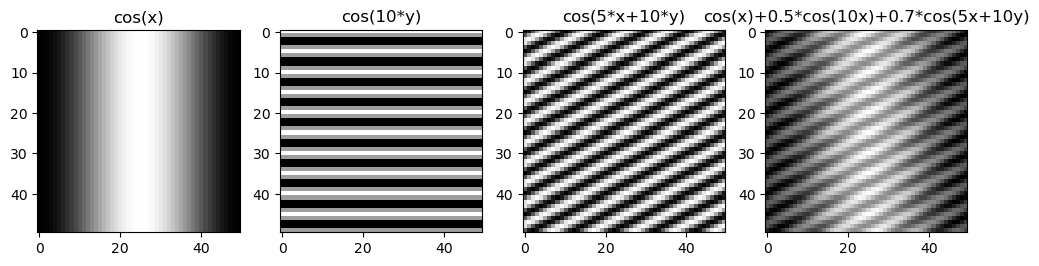

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 図の作成
plt.figure(figsize=(12, 5))
plt.gray()

# 2次元正弦波(cos)の生成
def f_xy(u, v):
    f = []
    step = 2 * np.pi / 50   # 2πを50等分するときのステップ幅
    for j in range(50):
        y = -np.pi + j * step
        for i in range(50):
            x = -np.pi + i * step
            f.append(np.cos(u*x + v*y))
    return np.array(f).reshape(50, 50)

plt.subplot(1,4,1); plt.title("cos(x)"); 
plt.imshow(f_xy(1,0))
plt.subplot(1,4,2); plt.title("cos(10*y)"); 
plt.imshow(f_xy(0,10))
plt.subplot(1,4,3); plt.title("cos(5*x+10*y)"); 
plt.imshow(f_xy(5,10))
plt.subplot(1,4,4); plt.title("cos(x)+0.5*cos(10x)+0.7*cos(5x+10y)"); 
plt.imshow(f_xy(1,0)+0.1*f_xy(0,10)+0.7*f_xy(5, 10))

2次元正弦波は$\cos(ux + vy)$, $\sin(ux + vy)$によって定義され，
$u$, $v$を変化させることでさまざまな縞模様パタンができる．
$u$, $v$をそれぞれ**水平周波数**, **垂直周波数**とよぶ．
水平周波数$u$，垂直周波数$v$に対応する正弦波パターンは図に示すように，
 * 垂直周波数$v=0$で水平周波数$u$を大きくすると，間隔の狭い縦縞パターン（<font color="red">■</font>）になる，
 * 水平周波数$u=0$で垂直周波数$v$を大きくすると，横縞パターン（<font color="light blue">■</font>）になる．
 * 水平・垂直周波数を共に大きくしていくと，斜め縞パターン（□)になる．

<img src="img/fourier2d2.png" width=500px/>

## 2Ｄフーリエ級数展開

1次元の場合と同じように，任意の周期的に繰り返す2次元関数（画像）$f(x, y)$は2次元正弦波の重ね合わせで合成できる．つまり，
$$
f(x, y) = \sum_{u=-\infty}^{\infty}\sum_{v=-\infty}^{\infty} \left\{ a(u, v) \cos \omega_0 (ux + vy) + b(u, v) \sin \omega_0 (ux + vy)\right\},\;\; 0 \leq x, y \leq W.\\
$$
ここで，重みパラメータ$a(u,v), b(u,v), \; (u, v = 0, 1, 2, ...)$はフーリエ係数であり，以下の式で算出できる．
$$
\begin{align}
a(u, v) &= \frac{1}{W^2} \iint_{0}^{W} f(x, y)\cos \omega_0 (ux + vy) dxdy,\\
b(u, v) &= \frac{1}{W^2} \iint_{0}^{W} f(x, y)\sin \omega_0 (ux + vy) dxdy.
\end{align}
$$ここで，$W$は画像の幅・高さ，$\omega_0 = 2\pi/W$と定義される量で基本周波数とよばれる．
$f(x, y)$からフーリエ係数$a(u, v), b(u, v)$を求めることを**フーリエ級数展開**（**フーリエ変換**）とよぶ． 

> 一般的には，複素数の指数関数$\mathrm{e}^{i\theta}=\cos\theta + i\sin\theta$（オイラーの公式)を用いて，
> 以下の式でフーリエ変換を定義することが多い．
> $$
\begin{align}
f(x, y) &= \sum_{u=-\infty}^{\infty}\sum_{v=-\infty}^{\infty} F(u, v) \mathrm{e}^{-i\omega_0 (ux + vy)}, \;\; 0 \leq x, y \leq W,\\
F(u, v) &= \frac{1}{W^2} \iint_{0}^{W} f(x, y) \mathrm{e}^{i\omega_0 (ux + vy)} dxdy,\\
\end{align}
$$
> $F(u, v)$は複素関数で$F(u, v)=a(u, v) + i b(u, v)$とおけば$\cos, \sin$を使った式と等価であることがわかる．
> また$f(x, y)$が実関数であれば，$|F(u, v)| = |F(-u, -v)|$が成立する．

> もとの2次元関数$f(x, y)$を**空間領域**，フーリエ変換後のフーリエ係数$F(u, v)$を**周波数領域**とよぶことがある．
> <img src="img/fourier2d3.png" width=600px/>

## 離散フーリエ変換と離散逆フーリエ変換

連続関数$f(x, y)$ではなく離散化されたデジタル画像を扱うので，実際の計算には離散フーリエ変換と離散逆フーリエ変換を利用する．

画像サイズ$W \times H$の画像$f(x, y)$の**2次元離散フーリエ変換**(DFT, Discrete Fourier Transform)は，
$$
F(u, v) = \sum_{y=0}^{H-1} \sum_{x=0}^{W-1} f(x, y) \exp\left\{-i2\pi \left(\frac{xu}{W}+\frac{yv}{H}\right) \right\}.
$$
この式で得られる$F(u, v)$をDFT係数とよぶ．
**2次元離散フーリエ逆変換**(IDFT, Inverse DFT)は，
$$
f(x, y) = \frac{1}{WH}\sum_{v=0}^{H-1} \sum_{u=0}^{W-1} F(u, v)\exp\left\{i2\pi \left(\frac{xu}{W}+\frac{yv}{H}\right) \right\}.
$$

## シミュレーション実験2
画像$f(x,y)$が正弦波の重ね合わせで合成できることを実験的に確認してみよう．

以下のセルでは次のような計算を行っている．
1. 画像$f(x, y)$からフーリエ係数$F(u, v)=a(u, v)+i b(u, v)$を求める．
2. スライドバーを動かすと変数$U0$, $V0$が変更される．
2. フーリエ級数の一部($-U0 \leq u \leq U0$, $-V0 \leq v \leq V0$の範囲)を使って画像$f'(x, y)$を合成する．つまり，正弦波を途中まで重ね合わせた画像$f'(x, y)$を表示する．
$$
\begin{align}
f'(x, y) &= \sum_{u=-U_0}^{U_0}\sum_{v=-V_9}^{V_0} F(u, v)\exp\left\{-\omega_0 (ux + vy)\right\} \\
&=
\sum_{u=-U_0}^{U_0}\sum_{v=-V_9}^{V_0} \left\{ a(u, v) \cos \omega_0 (ux + vy) + b(u, v) \sin \omega_0 (ux + vy)\right\}.
\end{align}
$$

スライドバーを左右に動かして，どのような画像が合成されるか確認してみよう．
2本のスライドバーを右端までドラッグすると元の画像が再構築される．

In [29]:
from expr3fft import *
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

W = 80
fxy = 255*imread("data/Text.bmp")
fxy = resize(fxy, (W, W))

Fuv = do_fft(fxy)

@interact(U0=(0, W//2, 1), V0=(0, W//2, 1))
def draw_composed(U0, V0):
    # 図の作成
    plt.figure(figsize=(8, 8))
    plt.gray()
    
    W2 = W//2
    Fuv_crop = np.zeros_like(Fuv)
    Fuv_crop[W2-V0:W2+V0+1, W2-U0:W2+U0+1] = Fuv[W2-V0:W2+V0+1, W2-U0:W2+U0+1] 
    composed = do_ifft(Fuv_crop)
    plt.subplot(1, 2, 1); plt.title("input image $f$"); plt.imshow(fxy)
    plt.subplot(1, 2, 2); plt.title("composed image $f'$"); plt.imshow(composed)
    plt.show()

interactive(children=(IntSlider(value=20, description='U0', max=40), IntSlider(value=20, description='V0', max…

## パワースペクトル

画像$f(x, y)$が決まれば，対応するフーリエ係数$F(u, v)$を求めることができる．
フーリエ係数を調べることで，画像がどのような周波数成分（正弦波）から構成されているか知ることができる．
ただし，フーリエ係数$F(u, v)$は複素数，あるいは$a(u, v), b(u, v)$は二つの実関数なので，
そのままでは1枚の画像として可視化できない．
そこで，フーリエ係数を視覚的に表現するために**パワースペクトル**(Power spectrum)を導入する．
パワースペクトルはフーリエ係数の絶対値の二乗，
$$
\left| F(u, v)\right|^2 = a(u, v)^2 + b(u, v)^2
$$
によって定義される．
パワースペクトルに変換することで，
周波数成分ごとのフーリエ係数の大きさを画像として可視化できる．

<img src="img/power_spectrum.png" width=600px/>

パワースペクトル画像の中央部（$u, v$が小さな値を持つ領域）は
**低周波数成分**に対応し，周辺部が**高周波数成分**に対応する．
左端の画像（電話をしている女性の顔）はなめらかな濃淡変化が支配的なので低周波数成分にエネルギーが集中し，高周波数成分が弱いことが分かる．一方，右端の画像（テストチャート）は細かなテクスチャや細い線が多く高周波数成分を多く含むことが視覚的に認識できる．

実際にいくつかの画像でパワースペクトル画像を作成してみる．以下のプログラムで使用している関数の説明は以下のとおり：
* `do_fft(image)` : 画像`image`をフーリエ変換しフーリエ係数を返す．$F(u, v)$に対応する複素数の2次元配列を返す．
* `do_ifft(fshift)`: フーリエ係数`fshift`をフーリエ逆変換し2次元配列（画像）を返す．
* `draw_src_power_spectrum(image, fshift)`：元画像とパワースペクトル画像を並べて表示するユーティリティ関数．

これらの関数はnumpyの`fft2()`, `ifft2()`関数を使って作成している．詳しくはソースコード[expr3fft.py](./expr3fft.py)を参照．

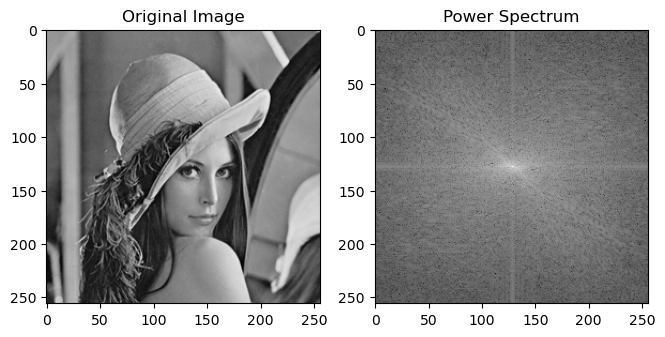

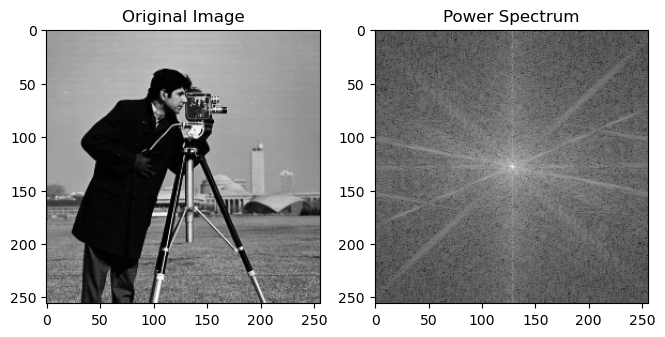

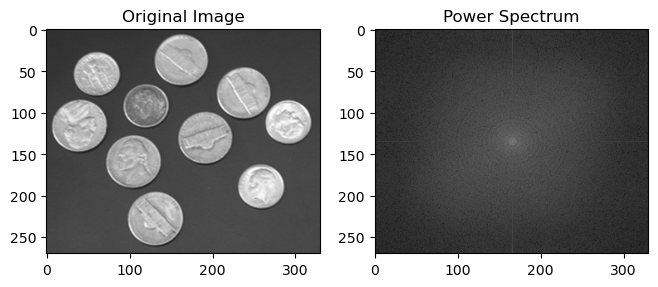

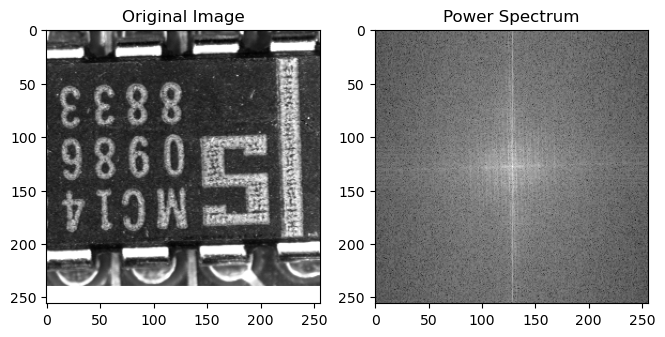

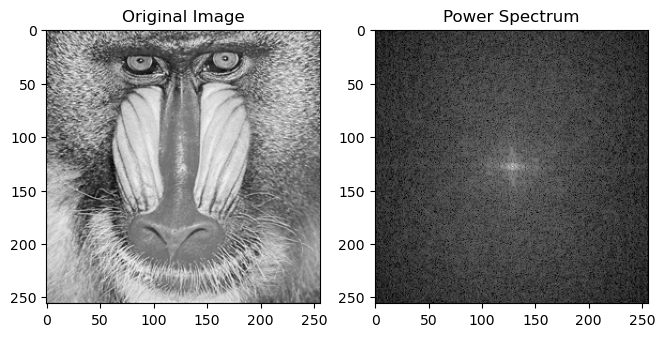

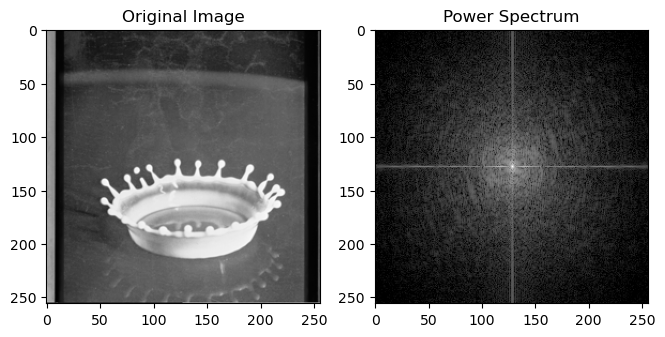

In [32]:
from expr3fft import *
import matplotlib.pyplot as plt
%matplotlib inline

im = imread("data/Lenna2.bmp"); fshift = do_fft(im); draw_src_power_spectrum(im, fshift); plt.show()
im = imread("data/Cameraman.bmp"); fshift = do_fft(im); draw_src_power_spectrum(im, fshift); plt.show()
im = imread("data/coins.jpg"); fshift = do_fft(im); draw_src_power_spectrum(im, fshift); plt.show()
im = imread("data/Text.bmp"); fshift = do_fft(im); draw_src_power_spectrum(im, fshift); plt.show()
im = imread("data/Mandrill.bmp", as_gray=True); fshift = do_fft(im); draw_src_power_spectrum(im, fshift); plt.show()
im = imread("data/milkdrop.bmp", as_gray=True); fshift = do_fft(im); draw_src_power_spectrum(im, fshift); plt.show()

## ●練習問題1

1. 正弦波$f(x, y)=\cos(\omega_0 x)+\sin(\omega_0 (-3y))$ ($\omega_0 = 2\pi/50$）に対応する正弦波パターンの画像`fimage`を作成し，その画像を表示しなさい．ただし，画像の縦・横の画素数はいずれも50画素とする．<br/>
  <img src="img/fourier2d4.png" width=150px/>
2. 画像`fimage`のフーリエ変換`fshift`を求め，パワースペクトル画像を表示しなさい．`draw_src_power_spectrum()`を使用してよい．<br/>
  <img src="img/fourier2d5.png" width=300px/>
3. フーリエ係数`fshift`が **複素数** の2次元配列であることを確認しなさい(`fshift`を`print`して確認)．
4. 水平周波数$u=1$に対応するフーリエ係数$F(1, 0)$, 垂直周波数$v=-3$に対応するフーリエ係数$F(0, -3)$が0以外の値をとり，上述した離散フーリエ変換の定義に従ってフーリエ係数が求まっていること，その他のフーリエ係数が0に近い値であることを確認しなさい．$F(1, 0)=-1250, F(0, -3)=1250i$であれば正しい．<br>**注意**: 配列`fshift`は直流成分($u=v=0$)が画像の中央にくるようにフーリエ係数をシフトして配置しているので，$F(u, v)$に対応する値が$`fshift[v+25, u+25]`に格納されていることに注意．

[[0.00000000e+00+0.00000000e+00j 5.15569474e-16-1.32375742e-16j
  0.00000000e+00+0.00000000e+00j ... 9.68566048e-17+9.09544061e-17j
  0.00000000e+00+0.00000000e+00j 5.15569474e-16+1.32375742e-16j]
 [0.00000000e+00+0.00000000e+00j 9.41128856e-16-9.53950248e-16j
  0.00000000e+00+0.00000000e+00j ... 1.40610988e-15+4.25681567e-16j
  0.00000000e+00+0.00000000e+00j 1.28428654e-15-3.82560690e-16j]
 [0.00000000e+00+0.00000000e+00j 1.33983920e-15+1.02882978e-15j
  0.00000000e+00+0.00000000e+00j ... 6.19993014e-17+1.94510987e-15j
  0.00000000e+00+0.00000000e+00j 6.78467516e-16+1.54704287e-15j]
 ...
 [0.00000000e+00+0.00000000e+00j 3.60478695e-16-1.25260242e-15j
  0.00000000e+00+0.00000000e+00j ... 1.15426972e-15-1.01489524e-15j
  0.00000000e+00+0.00000000e+00j 9.19335706e-16-9.24001930e-16j]
 [0.00000000e+00+0.00000000e+00j 6.78467516e-16-1.54704287e-15j
  0.00000000e+00+0.00000000e+00j ... 1.94516461e-15-6.02574996e-17j
  0.00000000e+00+0.00000000e+00j 1.33983920e-15-1.02882978e-15j]
 [0.000000

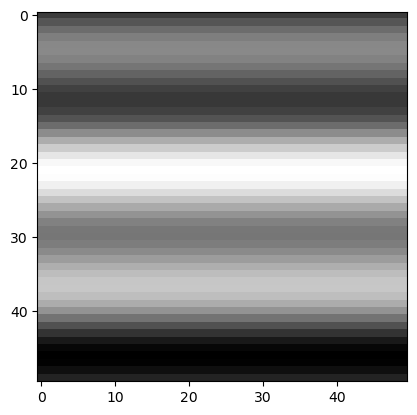

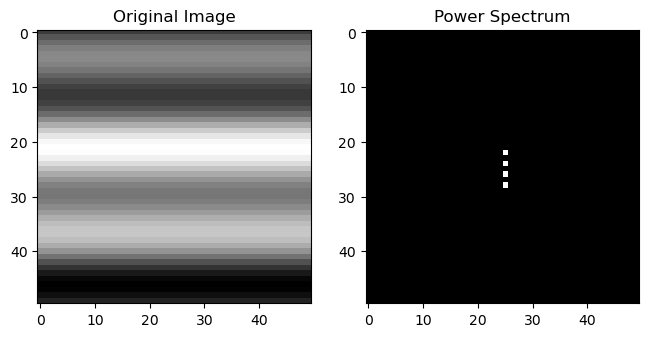

In [38]:
import numpy as np
from expr3fft import *
import matplotlib.pyplot as plt
plt.gray()
%matplotlib inline

# task 1 (2.1 2次元正弦波の重ね合わせのコードを参考にするとよい)
# ↓ここにコードを追加
f = []
step = 2 * np.pi / 50   # 2πを50等分するときのステップ幅
for j in range(50):
    y = -np.pi + j * step
    for i in range(50):
        x = -np.pi + j * step
        f.append(np.cos(x) + np.sin(-3 * y))
fimage = np.array(f).reshape(50, 50)
# ↑ここまで
plt.imshow(fimage)

# task 2
# ↓ここにコードを追加
fshift = do_fft(fimage); draw_src_power_spectrum(fimage, fshift);
# ↑ここまで

# task 3 (fshiftをprintして確認)
# ↓ここにコードを追加
print(fshift)
# ↑ここまで

# task 4 (F(u, v)に対応する値をprintして確認)
# ↓ここにコードを追加
print(fshift[25, 25+1])
print(fshift[25-3, 25])
# ↑ここまで


## 周波数フィルタリング

周波数フィルタリングは，空間フィルタリングのように空間領域$f(x, y)$で画像を加工するのではなく，周波数領域でフーリエ変換$F(u, v)$を加工し，それを空間領域に逆フーリエ変換することで画像変換を行う．ローパスフィルタ，ハイパスフィルタは周波数フィルタの代表例である．

* ローパスフィルタ（低域通過フィルタ; lowpass filter): 低周波数成分を通過するフィルタ
  - $H(u, v) = 1[|u| < T\;  \mathrm{and}\; |v| < T]$
  - $H(u, v) = \exp(-\frac{u^2+v^2}{2\sigma^2})$
* ハイパスフィルタ（高域通過フィルタ; highpass filter)：高周波数成分を通過するフィルタ
   - $H(u, v) = 1[|u| \geq T\;  \mathrm{or}\; |v| \geq T]$
   - $H(u, v) = 1-\exp(-\frac{u^2+v^2}{2\sigma^2})$
   
実際に，低周波数成分，高周波数成分を削除することでどのような画像が生成されるか確認する．

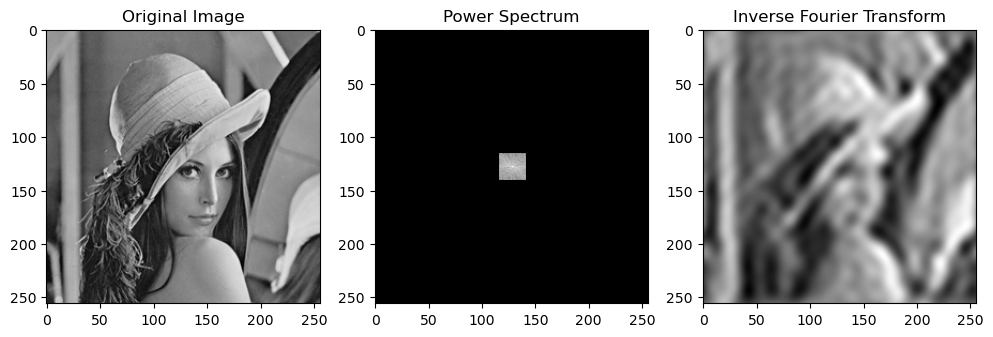

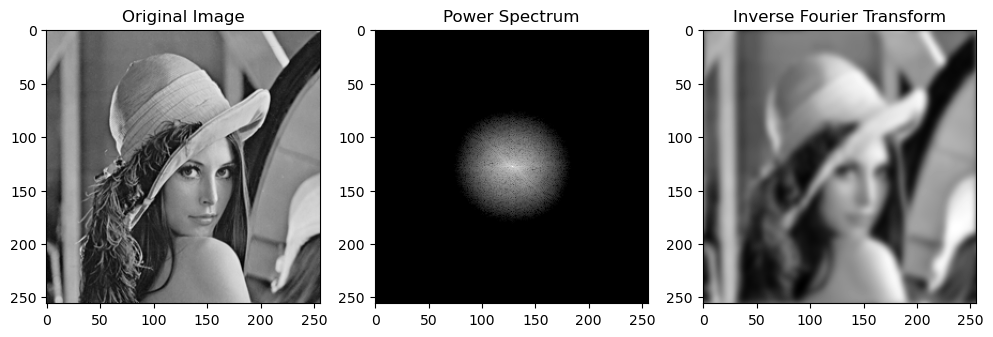

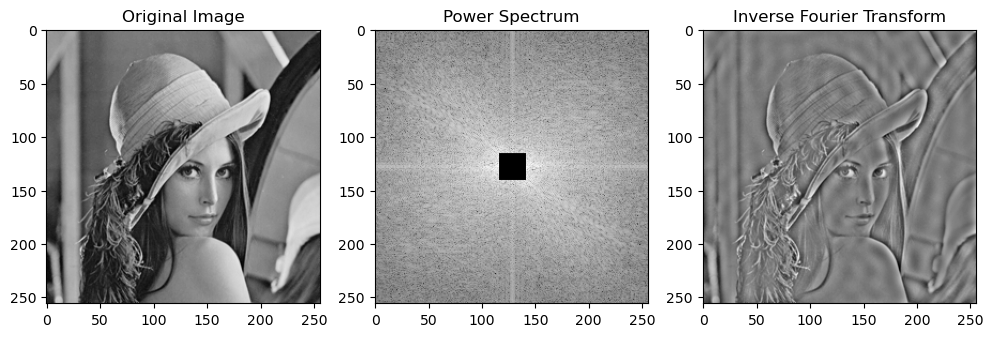

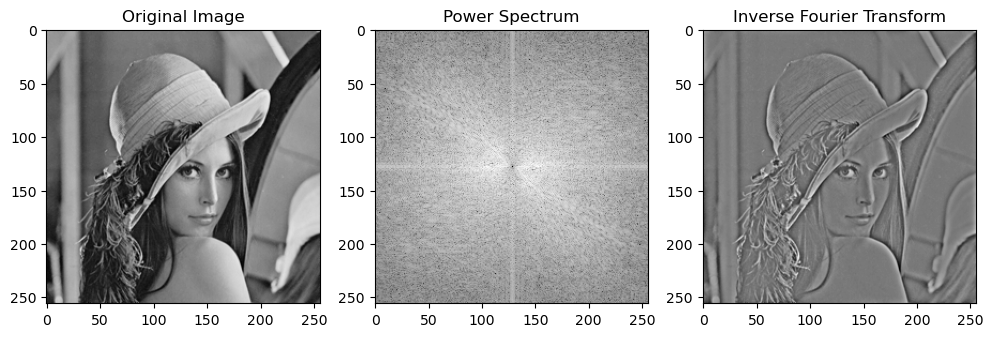

In [41]:
import numpy as np
from expr3fft import *
import matplotlib.pyplot as plt
%matplotlib inline

def low_pass(u, v, T = 0.05):
    """ ローパスフィルタの作成 """
    return 1.0 if np.abs(u) < T and np.abs(v) < T else 0.0

def low_pass2(u, v, T = 0.05):
    """ ローパスフィルタの作成2 """
    return 1.0 if u**2 + v**2 < T**2 else 0.0

def low_pass_gauss(u, v, sigma = 0.05):
    """ ガウス分布型ローパスフィルタ """
    return np.exp(-1.0*(u**2 + v**2)/(2*sigma**2))

def high_pass(u, v, T = 0.05):
    """ ハイパスフィルタ """
    return 1.0 if np.abs(u) >= T or np.abs(v) >= T else 0.0

def high_pass_gauss(u, v, sigma = 0.05):
    """ ガウス分布型ハイパスフィルタ """
    return 1.0 - low_pass_gauss(u, v, sigma)

im = imread("data/Lenna2.bmp")

fshift = do_fft(im);
fshift = do_ffilter(fshift, low_pass)  # 矩形型のローパスフィルタを作用
draw_all(im, fshift); plt.show()

fshift = do_fft(im)
fshift = do_ffilter(fshift, low_pass_gauss)  # ガウス型ローパスフィルタを作用
draw_all(im, fshift); plt.show()

fshift = do_fft(im)
fshift = do_ffilter(fshift, high_pass)  # 矩形型のハイパスフィルタを作用
draw_all(im, fshift); plt.show()

fshift = do_fft(im)
fshift = do_ffilter(fshift, high_pass_gauss) # ガウス型ハイパスフィルタを作用
draw_all(im, fshift); plt.show()


## 畳み込み定理

空間フィルタのフィルタ係数$w(s, t)$を反転させたものを新たに$h(s, t) = w(-s, -t)$とおくと，空間領域における畳み込み演算を以下のように書き換えることができる．
$$
g(x, y) = \sum_{s = -a}^a \sum_{t=-b}^b h(s, t) f(x - s, y - t) = \sum_{s = -a}^a \sum_{t=-b}^b w(s, t) f(x + s, y + t)
$$
このとき，画像$f(x, y), g(x, y)$, フィルタ$h(x, y)$のフーリエ変換(係数)を$F(u, v), G(u, v), H(u, v)$とすると，
以下の式が成立することが知られており，**畳み込み定理**(convolution theorem)とよばれる．
$$
G(u, v) = F(u, v)\cdot H(u, v)
$$
つまり，空間領域における畳み込み演算$f \ast h$は周波数領域における積演算$F \cdot H$と等価で，$F \cdot H$をフーリエ逆変換すれば
畳み込み演算後の画像$g(x, y)$を得ることができる．

<img src="img/conv_and_ft.png" width=400px/>

# ハイブリッド画像

ハイブリッド画像(hybrid images)は，図4.9 に示すように，遠くから眺めたときと，近くで
眺めたときで異なる像が見える静止画像である．以下の画像は近くでみるとアインシュタイン，モニターから離れてみるとマリリンモンローに見える．

<img src="https://jeremykun.files.wordpress.com/2014/09/marilyn-einstein-hybrid-collage.png" width=800px/><br>
出典: https://jeremykun.com/2014/09/29/hybrid-images/

自分でモニターに近づいたり，遠ざかったりする代わりに，ハイブリッド画像を段階的に縮小した画像を並べることで，ハイブリッド画像の効果を確認できる．
大きな画像（左）では猫が見えるが，縮小した画像（右）ではカピバラが見えるようになる．

<img src="img/hybridimage_cat.png" width=800px/>

ハイブリッド画像の生成原理は簡単で，作成手順は以下のとおり：
1. 2 枚の画像A, B を入力する，
2. 画像A にローパスフィルタ（低域通過フィルタ）を作用した画像をA’ とする，
3. 画像B にハイパスフィルタ（高域通過フィルタ）を作用した画像をB’ とする，
4. 画像A’, B’ を重ね合わせた画像(A’ + B’) を出力する．

<img src="img/hybridimage_proc.png" width=600px/>

参考文献:
* MIT, <a href="http://cvcl.mit.edu/hybrid_gallery/gallery.html">Hybrid Image Gallery</a>, http://cvcl.mit.edu/hybrid_gallery/gallery.html.
* Aude Oliba, Antonio Torralba, and Philippe. G. Schyns, "<a href="http://cvcl.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf">Hybrid Images</a>," SIGGRAPH '06, pp. 527-532, 2006.

## ■課題

ハイブリッド画像(hybrid image)を作成するコードを以下のセルに示す．このコードを使用して，1～3の課題に取り組みなさい．

1. **自分で撮影した**2枚の画像を合成してハイブリッド画像を作成しなさい．
    1. 自分で撮影した画像をPCにコピー(ダウンロード)する．特に理由があって他人が作成した画像を使用する場合には，著作権上の問題がないことを確認した上で，引用元の情報をレポートに明記すること．
    2. ペイントソフト等を使って正方形の領域を切り出し，必要に応じてグレースケール画像に変換し，JPGファイル等に保存する(最終的には512x512画素に拡大縮小して処理するので同程度の画素数にしておくとよい）．
    3. ハイブリッド画像を合成・表示する．
    4. ローパスフィルタ(LPF)，ハイパスフィルタ(HPF)のカットオフ周波数`cutoff1`, `cutoff2`を変化させると，ハイブリッド画像の「認識しやすさ」がどのように変化するだろうか？<br/>
    <img src="img/cutoff_freq.png" width=300px/><br/>
カットオフ周波数によって，2枚の画像をはっきりと認識できるようになったり，どちらか一方の画像しか認識できなくなったりする．2枚の画像の「認識しやすさ」と「カットオフ周波数」，「LPFとHPFのカットオフ周波数の間隔(gap)」の関係について評価し考察しなさい．
        * 「認識しやすさ」は主観的なもので人によって異なる．複数の被験者に評価してもらう方法が望ましいが，自分自身の主観的な評価でも可とする．
        * レポートには，実験条件として少なくとも，モニター上の画像サイズ(cm)，被験者とモニターの間の距離(cm)を記載すること．「認識しやすさ」の評価結果は表やグラフとして整理すること．
        * 作成したハイブリッド画像だけでなく，元画像もレポートに掲載すること．
2. **4組以上**の画像について，ハイブリッド画像を作成し，どのような画像を用いると認識しやすいハイブリッド画像が合成できるか検討しなさい．
    * LPFをかける画像とHPFをかける画像を入れ替えてみるとどうなるか？
    * 性質の異なるさまざまな画像（例えば，高周波数成分を多く含むもの，含まないもの，エッジが明瞭なもの，不明瞭なもの，カラー画像，グレースケール画像，表情の異なる2枚の顔画像など）でハイブリッド画像を作成するとどうなる？
3. （オプション）周波数フィルタリングの代わりに，空間領域における畳み込み演算を用いてハイブリッド画像を作成するプログラムを実装しなさい．
    * 畳み込み定理より，周波数領域におけるガウシアン型LPFが，空間領域におけるガウシアンフィルタの畳み込み演算と等価であることを利用する．numpy, scikit-image等の関数を利用してよい．

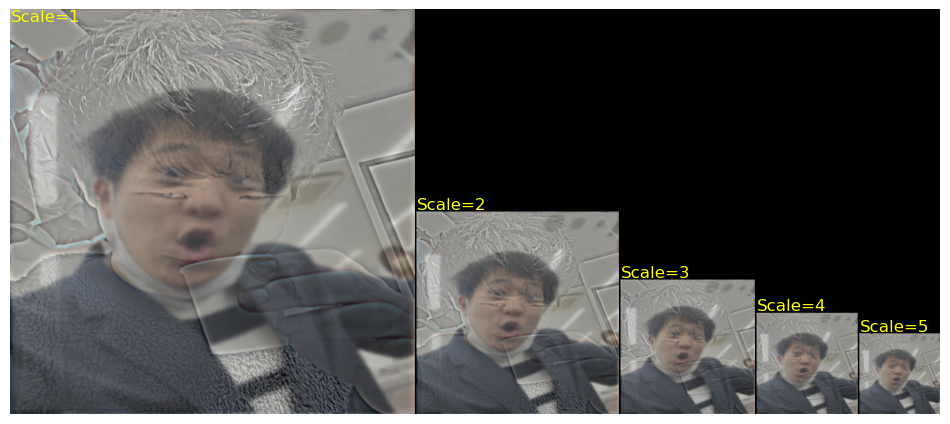

In [50]:
from expr3fft import *
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
%matplotlib inline

def hybrid_image(im1, im2, cutoff1 = 16, cutoff2 = 16, visu = False):
    """ ハイブリッド画像の作成 
         cutoff1 -- ガウス型ローパスフィルタのカットオフ周波数(cycles/image)
         cutoff2 -- ガウス型ハイパスフィルタのカットオフ周波数(cycles/image)
    """
    # 低周波数領域，高周波領域のカットオフ周波数cutoff1, cutoff2から周波数フィルタ関数を作成
    def lowpass_gauss(u, v, sigma):
        """ ガウス分布型ローパスフィルタ """
        return np.exp(-1.0*(u**2 + v**2)/(2*sigma**2))

    def lowpass(u, v): 
        return lowpass_gauss(u, v, 1.2 * cutoff1 / im1.shape[0])

    def highpass(u, v): 
        return 1.0 - lowpass_gauss(u, v, 0.63 * cutoff2 / im1.shape[0])
    
    # (1) フーリエ変換
    fshift1 = do_fft(im1)
    fshift2 = do_fft(im2)
    
    # (2) 周波数フィルタリング
    fshift1 = do_ffilter(fshift1, lowpass)
    fshift2 = do_ffilter(fshift2, highpass)
    
    # (3) ハイブリッドイメージの合成
    hybrid_image = do_ifft(fshift1 + fshift2) 
    hybrid_image = array_normalize(hybrid_image)  # 画素値を0～1に正規化
    
    return hybrid_image
W = 512   # 画像サイズ（縦横の画素数)
im1 = imread("data/kadai1-1.jpg")
im2 = imread("data/kadai1-2.jpg")
#im2 = imread("data/Girl.bmp")

# 画像のサイズを同じに揃える
im1 = resize(im1, (W, W))
im2 = resize(im2, (W, W))

# グレースケール画像にする
#im1 = rgb2gray(im1)*255
#im2 = rgb2gray(im2)*255

plt.figure(figsize=(12, 12))
him = hybrid_image(im1, im2, cutoff1=32, cutoff2=32, visu=False)
show_hybrid_image(him)